<a href="https://colab.research.google.com/github/Lnguyen19/CS_478/blob/main/Lam_Nguyen_Eric_Thompson_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


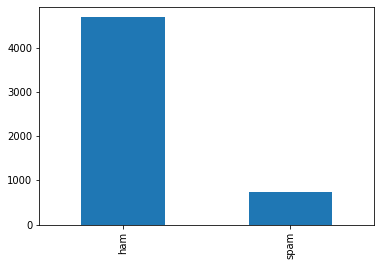

In [ ]:
# 1
# Load the dependencies and your data set.
import keras
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding, SpatialDropout1D, Conv1D, GlobalMaxPool1D, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import LSTM, Bidirectional # LSTM
from keras.layers import GRU # GRU
from keras.models import Model # Non sequential model
from keras.layers import Input, concatenate # Non sequential model

from keras.layers import SimpleRNN

import pickle
import numpy as np
from keras.preprocessing.text import Tokenizer

# Reading in data from url
dataset_url = 'https://raw.githubusercontent.com/WithAPorpoise/public_datasets/main/spam_ham_dataset.csv'
data = pd.read_csv(dataset_url, usecols=["class", "message"]) # Ignore NaN columns
print(data.head())

# Split message and class columns into variables
message_data = data["message"]
class_data = data["class"]

class_data.value_counts().plot(kind='bar')

labelEncoder = preprocessing.LabelEncoder()
class_data = labelEncoder.fit_transform(class_data)
class_data = class_data.reshape(-1, 1)

In [ ]:
# 2
# Separate your data set between train and test in a 70/30 split. 
# Additionally, I would like you to print a graph of the number of 
# label_value_counts() of the data set to show the distribution of labels.

x_train, x_test, y_train, y_test = train_test_split(message_data, class_data, test_size=0.3)



In [ ]:
# 4
#    Set your hyperparameters:

#    epochs,
#    batch size,
#    dimension,
#    unique words,
#    stop words,
#    maximum message length,
#    padding type,
#    truncation type,
#    #dense layer,
#    dropout,
#    n_filters,
#    optimizers,
#    or anything else needed.

output_dir = 'model_output/dense'
epochs = 3
batch_size = 128

n_dim = 100
n_unique_words = 5000
total_elements = 5405
n_words_to_skip = 50
pad_type = trunc_type = 'pre'
n_dense = 100
dropout = 0.5
#CNN
cnn_max_review =100 
cnn_dense = 256
cnn_dropout = 0.2
n_conv = 256
k_conv = 3

#RNN
n_rnn = 256
drop_rnn = 0.2
drop_embed = 0.2

#LSTM
out_put_ = 'model_output/conv'
lstm_max_review = 100
lstm_drop_embed = 0.2
lstm_n_conv = 256 
lstm_k_conv = 0.2
lstm_dropout = 0.2

In [ ]:
# HW5 HyperParams
# LSTM layer architecture:
n_lstm = 256 
drop_lstm = 0.2

# CNN architecture
n_conv = 64
k_conv = 3
mp_size=4

# GRU architecture
n_gru = 256
drop_gru = 0.2

# LSTM stack layer architecture
n_lstm_1 = 64
n_lstm_2 = 64
drop_lstm = 0.2

# Multi conv (Non-sequential)
n_conv_1 = n_conv_2 = n_conv_3 = 256
k_conv_1 = 3
k_conv_2 = 2
k_conv_3 = 4

In [ ]:
# 3
# Apply all ( or subset of) the preprocessing steps that we learned in the class:
# Tokenization
# Convertion to lowercase
# Removing stop words
# Removing puntuation
# Stemming
# n-grams

max_message_length = 100

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

# Tokenizing
token = Tokenizer(num_words=n_unique_words)
token.fit_on_texts(x_train)

x_train_emb = token.texts_to_sequences(x_train)
x_test_emb = token.texts_to_sequences(x_test)

print(x_train[1])
print(x_train_emb[1])

x_train = pad_sequences(x_train_emb, padding='pre', maxlen=max_message_length)
x_test = pad_sequences(x_test_emb, padding='pre', maxlen=max_message_length)

print(x_train[1])

Ok lar... Joking wif u oni...
[38, 22, 1796, 2, 1797, 21, 13, 2314, 12, 2315, 3428, 9, 2316, 2317, 13, 3429, 31, 620, 757, 141, 310]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   38   22 1796    2 1797
   21   13 2314   12 2315 3428    9 2316 2317   13 3429   31  620  757
  141  310]


In [ ]:
# 5
#     Create, fit and evaluate the following models:

# Follow the instructions laid out from class lecture. Create one of each of the following models:

#    Dense
#    Convolutional
#    Simple RNN
#    LSTM

# Dense
model1 = Sequential() # Each layer flows to the next
#1st hidden layer
model1.add(Embedding(n_unique_words, n_dim, input_length=max_message_length))
model1.add(Flatten())
#2nd hidden layer
model1.add(Dense(n_dense, activation='relu'))
model1.add(Dropout(dropout))
#3rd hidden layer if needed more
model1.add(Dense(n_dense, activation='relu'))
model1.add(Dropout(dropout))
#Output layer: Single sigmoid neuron to predict binary classification
model1.add(Dense(1, activation='sigmoid'))

# CNN
model2 = Sequential()
model2.add(Embedding(n_unique_words, n_dim, input_length=cnn_max_review))
model2.add(SpatialDropout1D(drop_embed))
model2.add(Conv1D(n_conv,k_conv,activation = 'relu'))
model2.add(GlobalMaxPool1D())
model2.add(Dense(cnn_dense,activation='relu'))
model2.add(Dropout(cnn_dropout))
model2.add(Dense(1,activation = 'sigmoid'))

# RNN
model3 = Sequential()
#1st hidden layer
model3.add(Embedding(n_unique_words, n_dim, input_length=max_message_length))
model3.add(SpatialDropout1D(drop_embed))
#2nd hidden layer
model3.add(SimpleRNN(n_rnn, dropout=drop_rnn))
#output layer
model3.add(Dense(1, activation='sigmoid'))

# LSTM (ERROR: Shapes None,100 and None,100,100 are incompatible)
model4 = Sequential()
model4.add(Embedding(n_unique_words, n_dim, input_length= lstm_max_review)) 
model4.add(SpatialDropout1D(lstm_drop_embed))
#model4.add(Conv1D(lstm_n_conv, lstm_k_conv, activation='relu'))
#model4.add(GlobalMaxPool1D())
model4.add(Dense(n_dense, activation='relu'))
model4.add(Dropout(lstm_dropout))
model4.add(Dense(1, activation='sigmoid'))

# Compiling
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting
history1 =  model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
history2 =  model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
history3 =  model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
history4 =  model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/3
30/30 [==============================] - 2s 48ms/step - loss: 0.3997 - accuracy: 0.8522 - val_loss: 0.2830 - val_accuracy: 0.8619
Epoch 2/3
30/30 [==============================] - 1s 40ms/step - loss: 0.2089 - accuracy: 0.8781 - val_loss: 0.1699 - val_accuracy: 0.9346
Epoch 3/3
30/30 [==============================] - 1s 39ms/step - loss: 0.1258 - accuracy: 0.9603 - val_loss: 0.0917 - val_accuracy: 0.9846
Epoch 1/3
30/30 [==============================] - 3s 79ms/step - loss: 0.4646 - accuracy: 0.8668 - val_loss: 0.3740 - val_accuracy: 0.8619
Epoch 2/3
30/30 [==============================] - 2s 71ms/step - loss: 0.3255 - accuracy: 0.8673 - val_loss: 0.2742 - val_accuracy: 0.8619
Epoch 3/3
30/30 [==============================] - 2s 72ms/step - loss: 0.2082 - accuracy: 0.8845 - val_loss: 0.1802 - val_accuracy: 0.9525
Epoch 1/3
30/30 [==============================] - 11s 323ms/step - loss: 0.4321 - accuracy: 0.8491 - val_loss: 0.4347 - val_accuracy: 0.8619
Epoch 2/3
30/30 [=

In [ ]:
#
# HW5
#

# Bi-LSTM
modelBi = Sequential()
modelBi.add(Embedding(n_unique_words, n_dim, input_length=max_message_length)) 
modelBi.add(SpatialDropout1D(drop_embed))
modelBi.add(Bidirectional(LSTM(n_lstm_1, dropout=drop_lstm, return_sequences=True)))
modelBi.add(Dense(1, activation='sigmoid'))

# Stacked Bi-LSTM
modelSt = Sequential()
modelSt.add(Embedding(n_unique_words, n_dim, input_length=max_message_length)) 
modelSt.add(SpatialDropout1D(drop_embed))
modelSt.add(Bidirectional(LSTM(n_lstm_1, dropout=drop_lstm, return_sequences=True)))
modelSt.add(Bidirectional(LSTM(n_lstm_2, dropout=drop_lstm)))
modelSt.add(Dense(1, activation='sigmoid'))

modelBi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelSt.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# GRU
modelGRU = Sequential()
modelGRU.add(Embedding(n_unique_words, n_dim, input_length=max_message_length)) 
modelGRU.add(SpatialDropout1D(drop_embed))
modelGRU.add(GRU(n_gru, dropout=drop_gru))
modelGRU.add(Dense(1, activation='sigmoid'))

# Conv-LSTM
modelCL = Sequential()
modelCL.add(Embedding(n_unique_words, n_dim, input_length=max_message_length)) 
modelCL.add(SpatialDropout1D(drop_embed))
modelCL.add(Conv1D(n_conv, k_conv, activation='relu'))
modelCL.add(MaxPooling1D(mp_size))
modelCL.add(Bidirectional(LSTM(n_lstm_1, dropout=drop_lstm, return_sequences=True)))
modelCL.add(Dense(1, activation='sigmoid'))

modelGRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelCL.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Multi-ConvNet
input_layer = Input(shape=(max_message_length,), dtype='int16', name='input')

embedding_layer = Embedding(n_unique_words, n_dim, name='embedding')(input_layer)
drop_embed_layer = SpatialDropout1D(drop_embed, name='drop_embed')(embedding_layer)

conv_1 = Conv1D(n_conv_1, k_conv_1, activation='relu', name='conv_1')(drop_embed_layer)
maxp_1 = GlobalMaxPooling1D(name='maxp_1')(conv_1)

conv_2 = Conv1D(n_conv_2, k_conv_2, activation='relu', name='conv_2')(drop_embed_layer)
maxp_2 = GlobalMaxPooling1D(name='maxp_2')(conv_2)

conv_3 = Conv1D(n_conv_3, k_conv_3, activation='relu', name='conv_3')(drop_embed_layer)
maxp_3 = GlobalMaxPooling1D(name='maxp_3')(conv_3)

concat = concatenate([maxp_1, maxp_2, maxp_3])

dense_layer = Dense(n_dense, activation='relu', name='dense')(concat)
drop_dense_layer = Dropout(dropout, name='drop_dense')(dense_layer)
dense_2 = Dense(int(n_dense/4), activation='relu', name='dense_2')(drop_dense_layer)
dropout_2 = Dropout(dropout, name='drop_dense_2')(dense_2)

predictions = Dense(1, activation='sigmoid', name='output')(dropout_2)

modelMCN = Model(input_layer, predictions)

modelMCN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting HW5 models
historyBi =  modelBi.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
historySt =  modelSt.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
historyGRU =  modelGRU.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
historyCL =  modelCL.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
historyMCN =  modelMCN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/3
30/30 [==============================] - 20s 517ms/step - loss: 0.4517 - accuracy: 0.8456 - val_loss: 0.3860 - val_accuracy: 0.8631
Epoch 2/3
30/30 [==============================] - 16s 534ms/step - loss: 0.3549 - accuracy: 0.8785 - val_loss: 0.2191 - val_accuracy: 0.9484
Epoch 3/3
30/30 [==============================] - 14s 482ms/step - loss: 0.1237 - accuracy: 0.9667 - val_loss: 0.0918 - val_accuracy: 0.9785
Epoch 1/3
30/30 [==============================] - 37s 974ms/step - loss: 0.3858 - accuracy: 0.8615 - val_loss: 0.2101 - val_accuracy: 0.8631
Epoch 2/3
30/30 [==============================] - 27s 903ms/step - loss: 0.0974 - accuracy: 0.9744 - val_loss: 0.0673 - val_accuracy: 0.9846
Epoch 3/3
30/30 [==============================] - 27s 911ms/step - loss: 0.0314 - accuracy: 0.9937 - val_loss: 0.0609 - val_accuracy: 0.9852
Epoch 1/3
30/30 [==============================] - 27s 821ms/step - loss: 0.4020 - accuracy: 0.8567 - val_loss: 0.2247 - val_accuracy: 0.8656
Epoch 

Dense
51/51 [==============================] - 0s 4ms/step


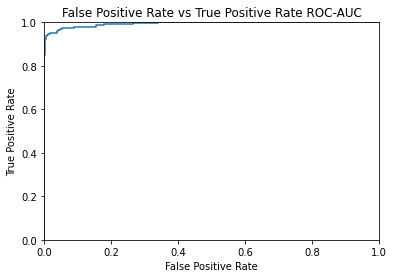

99.29
CNN
51/51 [==============================] - 0s 5ms/step


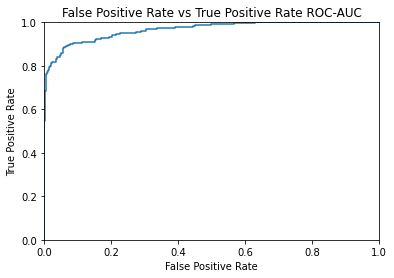

96.56
RNN
51/51 [==============================] - 2s 39ms/step


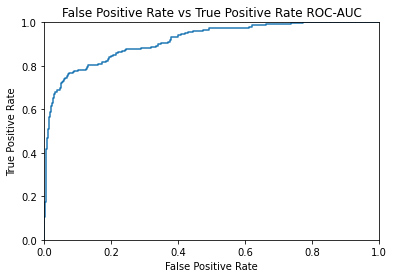

91.48
LSTM
51/51 [==============================] - 0s 4ms/step


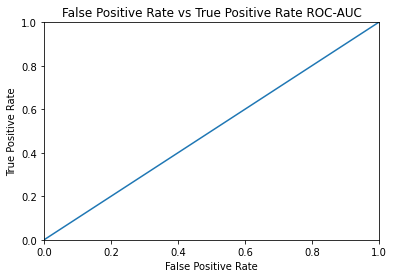

50.04


In [ ]:
# Evaluations can be done on the basis of ROC-AUC. You have to draw the ROC-AUC curve for each model.
def makeROC(model, name, lstm):
  print(name)
  y_hat = model.predict(x_test)
  new_y = y_hat
  if lstm:
    y_prob = model.predict(x_test)
    new_y = y_prob[:,1]
  fpr , tpr , thresholds = roc_curve (y_test , new_y)
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()
  print("{:0.2f}".format(roc_auc_score(y_test, new_y)*100.0))
  print("====================================")

makeROC(model1, "Dense", False)
makeROC(model2, "CNN", False)
makeROC(model3, "RNN", False)
makeROC(model4, "LSTM", True)

Bi-LSTM
51/51 [==============================] - 2s 33ms/step


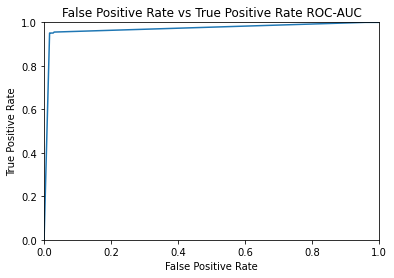

97.00
Stacked Bi-LSTM
51/51 [==============================] - 5s 67ms/step


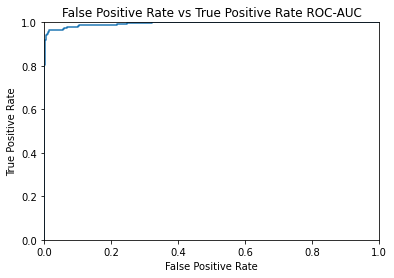

99.41
GRU
51/51 [==============================] - 6s 117ms/step


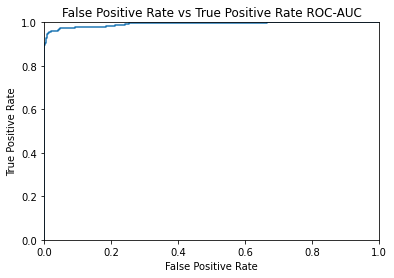

99.16
Conv-LSTM
51/51 [==============================] - 1s 15ms/step


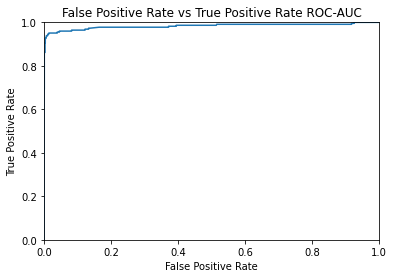

98.29
Multi-ConvNet
51/51 [==============================] - 2s 34ms/step


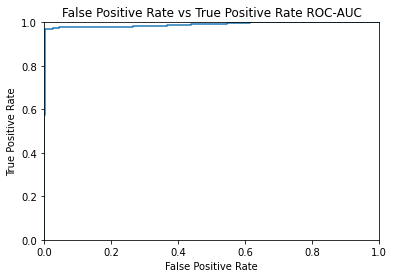

98.91


In [ ]:
from keras.layers.core import Reshape
from sklearn.datasets import make_classification

def makeROC(model, name, lstm):
  print(name)
  y_hat = model.predict(x_test)
  new_y = y_hat
  if lstm:
    y_prob = model.predict(x_test)
    new_y = y_prob[:,1]
  fpr , tpr , thresholds = roc_curve (y_test , new_y)
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()
  print("{:0.2f}".format(roc_auc_score(y_test, new_y)*100.0))
  print("====================================")

makeROC(modelBi, "Bi-LSTM", True)
makeROC(modelSt, "Stacked Bi-LSTM", False)
makeROC(modelGRU, "GRU", False)
makeROC(modelCL, "Conv-LSTM", True)
makeROC(modelMCN, "Multi-ConvNet", False)

In [ ]:
# 6
#    Tune your model
# Select the model which performed the best in the previous step and then tune the hyperparameters
# Improved CNN
model5 = Sequential()

model5.add(Embedding(n_unique_words, n_dim, input_length=cnn_max_review))
model5.add(SpatialDropout1D(drop_embed))

model5.add(Conv1D(n_conv,k_conv,activation = 'relu'))
model5.add(GlobalMaxPool1D())

model5.add(Dense(64, activation='relu'))
model5.add(Dense(128,activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(1,activation = 'sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history5 =  model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Epoch 1/3
30/30 [==============================] - 3s 83ms/step - loss: 0.5026 - accuracy: 0.8580 - val_loss: 0.3820 - val_accuracy: 0.8619
Epoch 2/3
30/30 [==============================] - 2s 73ms/step - loss: 0.3255 - accuracy: 0.8673 - val_loss: 0.2379 - val_accuracy: 0.8619
Epoch 3/3
30/30 [==============================] - 2s 73ms/step - loss: 0.1539 - accuracy: 0.9204 - val_loss: 0.0856 - val_accuracy: 0.9877


In [ ]:
# 7 
#tune your hw5's model
modelSt_new = Sequential()
modelSt_new.add(Embedding(n_unique_words, n_dim, input_length=max_message_length)) 
modelSt_new.add(SpatialDropout1D(drop_embed))
modelSt_new.add(Bidirectional(LSTM(n_lstm_1, dropout=0.4, return_sequences=True)))
modelSt_new.add(Bidirectional(LSTM(n_lstm_2, dropout=0.4)))
modelSt_new.add(Dense(1, activation='sigmoid'))
modelSt_new.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelSt_new.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history6 =  model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/3
30/30 [==============================] - 4s 130ms/step - loss: 0.0367 - accuracy: 0.9915 - val_loss: 0.0466 - val_accuracy: 0.9901
Epoch 2/3
30/30 [==============================] - 2s 73ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0506 - val_accuracy: 0.9895
Epoch 3/3
30/30 [==============================] - 2s 74ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0560 - val_accuracy: 0.9889


In [ ]:
# 8
#The best model us the Bi-LSTM model, the accuracy is the highest when come to other models such as GRU at 99.13 when compared to 99.37, with that being said, the Bi-LSTM model
# is the most effective